In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix

In [17]:
#load dataset
df=pd.read_csv("C:\Tanuja\Wage.csv")
print(df.head())

   year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   
3  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4  2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130.982177  
3  154.685293  
4   75.043154  


   year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   
3  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4  2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130.982177  
3  154.685293  
4   75.043154  


In [10]:
X=df[['age']]
y=df[['wage']]
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
#data visualization
sns.set_theme(style="ticks",rc={"axes.spines.right":False,"axes.spines.top":False})

Text(0.5, 1.0, 'Age vs Wage testing Dataset')

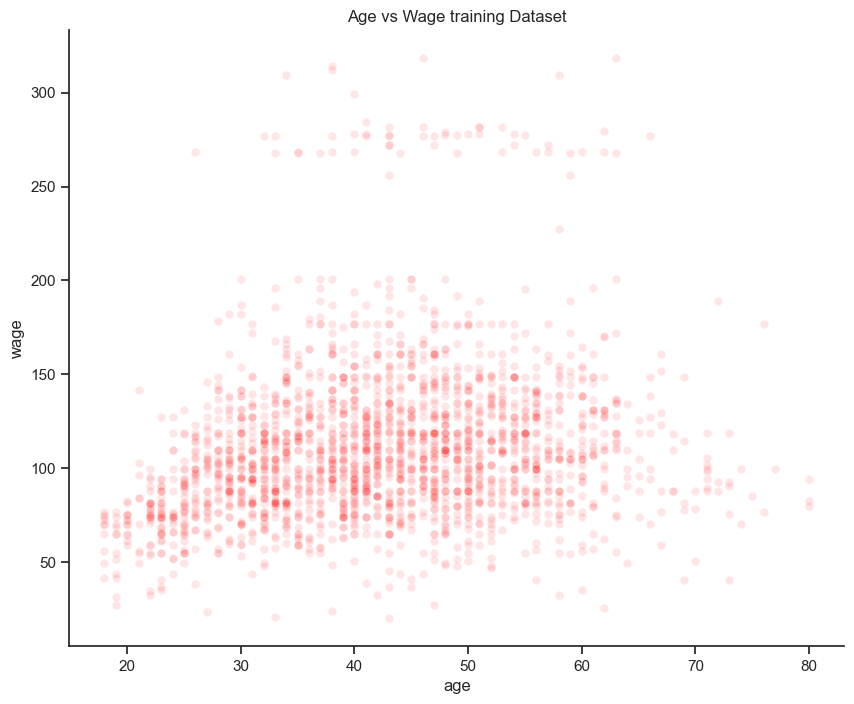

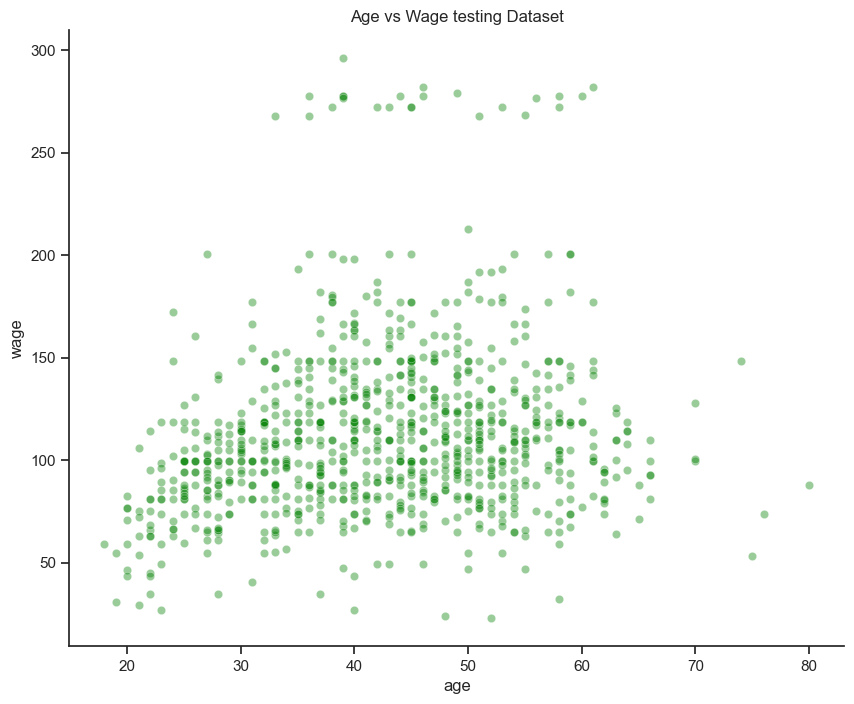

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train['age'],y=y_train['wage'],color="red",alpha=0.1)
plt.title("Age vs Wage training Dataset")

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_test['age'],y=y_test['wage'],color="green",alpha=0.4)
plt.title("Age vs Wage testing Dataset")

In [36]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print("slope of the Regression Line is:",lm.coef_)
print("Intercept of the Regression Line is:",lm.intercept_)
from sklearn.metrics import mean_squared_error
pred_test=lm.predict(X_test)


slope of the Regression Line is: [[0.72106369]]
Intercept of the Regression Line is: [80.58924709]


In [31]:
from patsy import dmatrix 
transformed_x=dmatrix("bs(train,knots=(25,40,60),degree=3,include_intercept=False)",{"train":X_train},return_type='dataframe')

import statsmodels.api as sm
cs=sm.GLM(y_train,transformed_x).fit()
pred_test=cs.predict(dmatrix("bs(test,knots=(25,40,60),degree=3,include_intercept=False)",{"test":X_test},return_type='dataframe'))
rmse_test=mean_squared_error(y_test,pred_test,squared=False)
print("Accuracy for cubic spline on testing data is :",rmse_test)
import numpy as np
plt.figure(figsize=(10,8))
xp=np.linspace(X_test.min(),X_test.max(),100)
pred=cs.predict(dmatrix("bs(xp,knots=(25,40,60),include_intercept=False)",{"xp":xp},return_type='dataframe'))

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.scatterplot(xX_)